In [1]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Spiral Healthy**

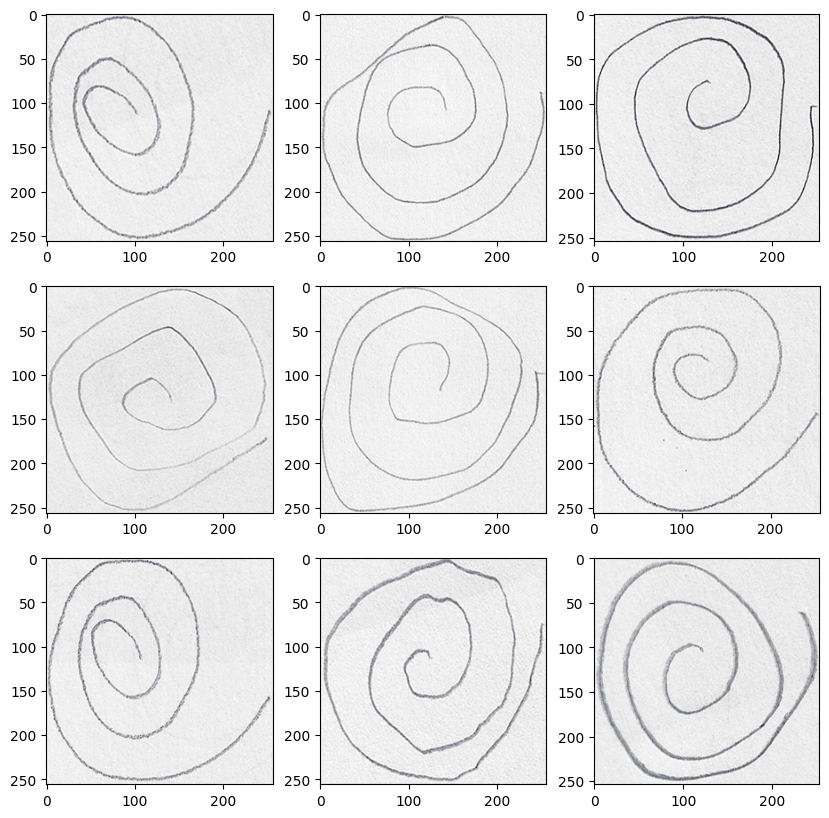

In [5]:
plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/drawings/spiral/training/healthy/"+
                  os.listdir("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/drawings/spiral/training/healthy")[i])
    plt.imshow(img)
plt.show()

Spiral Parkinson

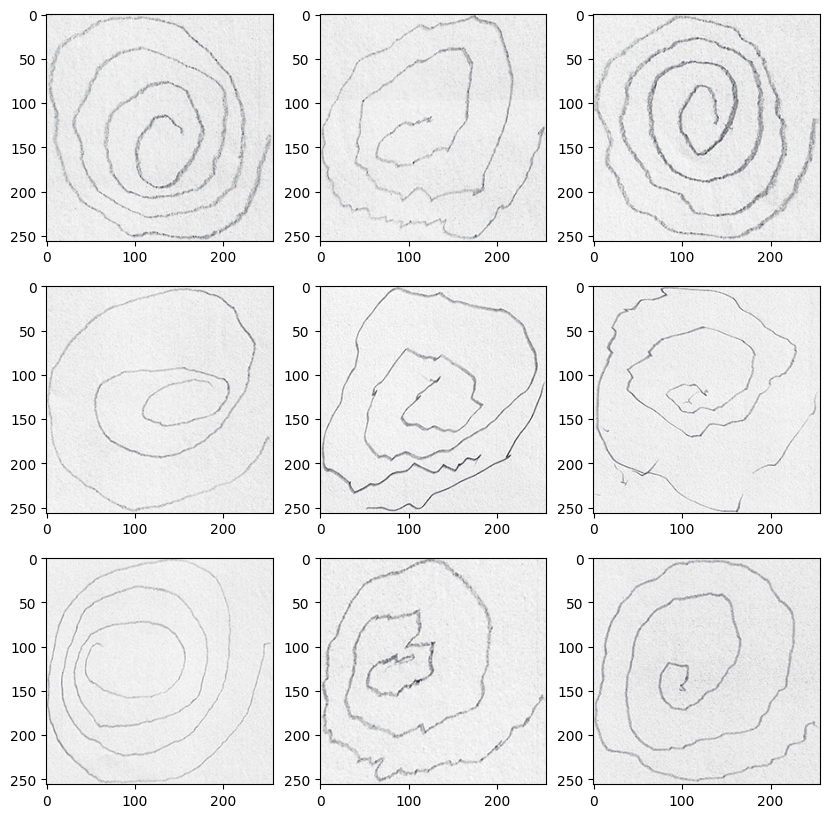

In [7]:
plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/training/parkinson/"+
                   os.listdir("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/training/parkinson")[i])
    plt.imshow(img)
plt.show()

Wave-Healthy

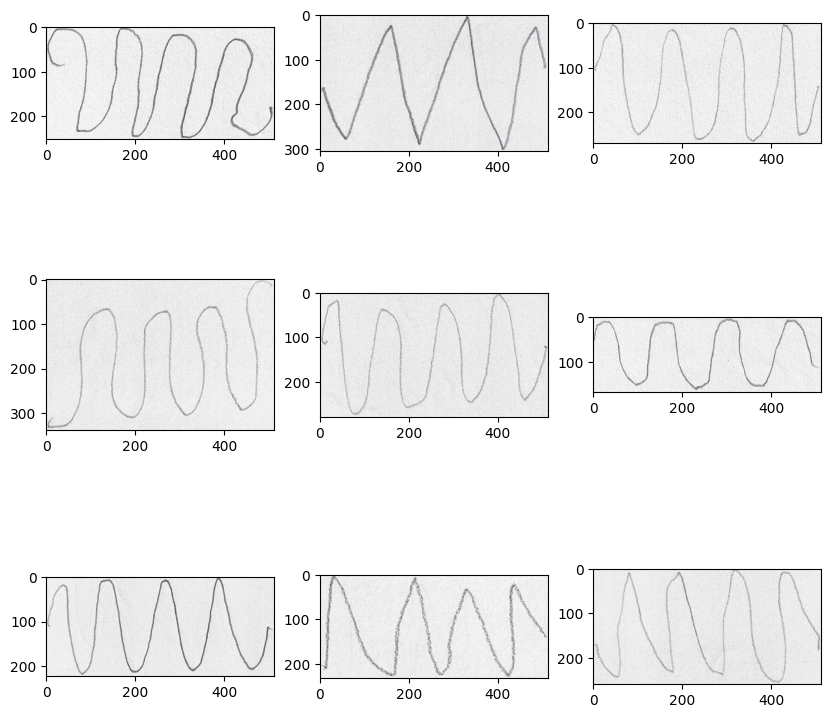

In [8]:
plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/training/healthy/"+
                  os.listdir("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/training/healthy")[i])
    plt.imshow(img)
plt.show()

**Wave-Parkinson**

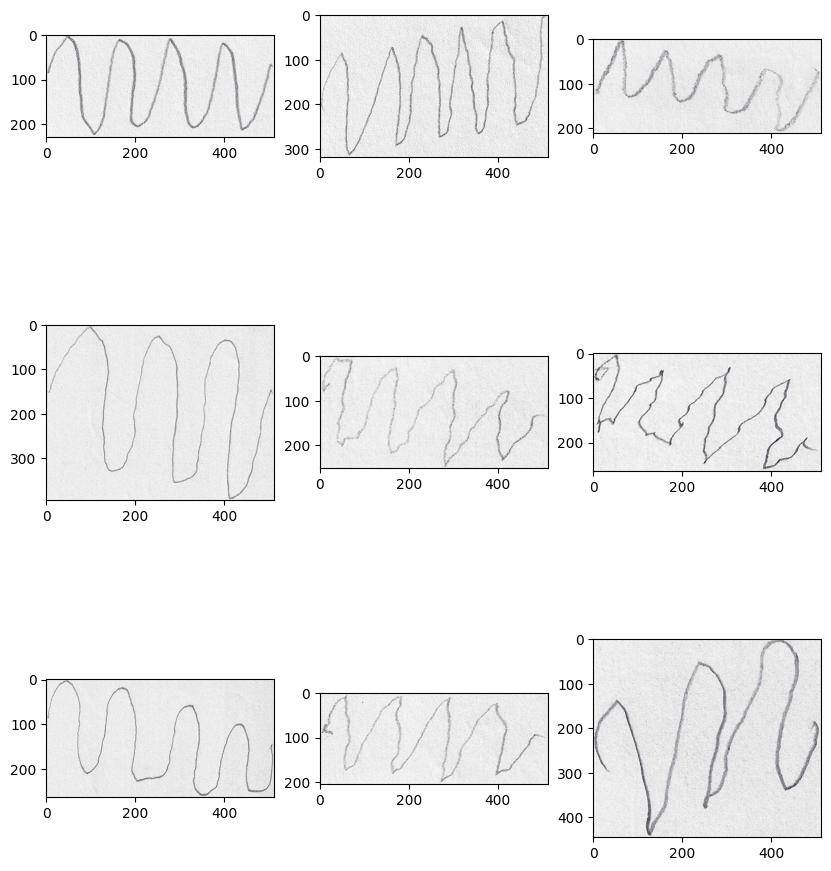

In [9]:
plt.figure(figsize= (10,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/training/parkinson/"+
                  os.listdir("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/training/parkinson")[i])
    plt.imshow(img)
plt.show()

Importing the CNN Layers

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Building Classifier

In [11]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

Image Data Generator

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
spiral_train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 10,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 10,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [16]:
wave_train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 10,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 10,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


**Fitting the Model with Data**

In [17]:
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 40

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

#classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
history = classifier.fit_generator(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=40,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=callbacks_list)

<ipython-input-18-134a875df24f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/40
7/7 [==============================] - 33s 5s/step - loss: 1.8457 - accuracy: 0.5323 - val_loss: 0.7123 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/40
7/7 [==============================] - 3s 468ms/step - loss: 0.7114 - accuracy: 0.4429 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/40
7/7 [==============================] - 2s 288ms/step - loss: 0.7145 - accuracy: 0.4516 - val_loss: 0.6986 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/40
7/7 [==============================] - 2s 245ms/step - loss: 0.7052 - accuracy: 0.5000 - val_loss: 0.7004 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/40
7/7 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.4677Restoring model weights from the end of the best epoch: 2.

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
7/7 [==============================] - 2s 244ms/step - loss: 0.6999 - accuracy: 0.4677 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5: early stopp

**Plotting Accuracy**

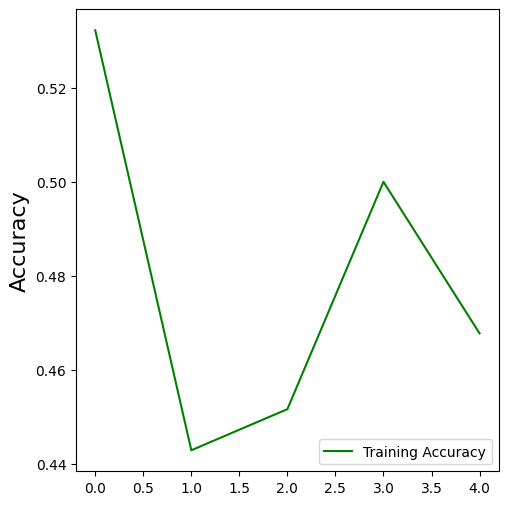

In [19]:
#plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')

**Loss Accuracy**

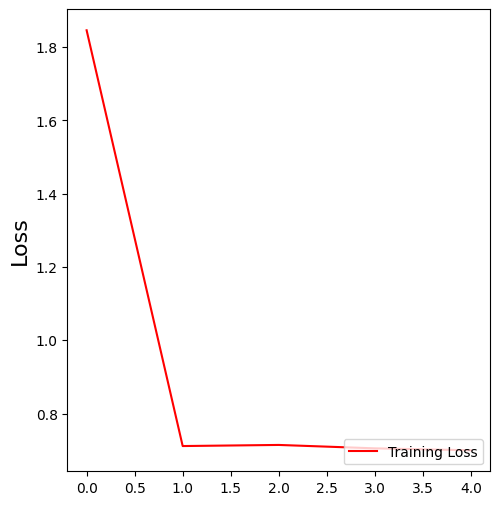

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()

In [21]:
# Evaluate the model
loss, accuracy = classifier.evaluate(spiral_test_generator)
print("Accuracy: {:.1f}%".format(accuracy * 100))

3/3 [==============================] - 0s 70ms/step - loss: 0.6931 - accuracy: 0.5000
Accuracy: 50.0%


In [22]:
loss, accuracy = classifier.evaluate(spiral_train_generator)
print("Accuracy: {:.1f}%".format(accuracy * 100))

8/8 [==============================] - 3s 351ms/step - loss: 0.6934 - accuracy: 0.5000
Accuracy: 50.0%


***This version build from Sayem***